# Clustering + TSNE en MNIST
### Rafael Takata García

### Objetivos de Aprendizaje
 - Aplicar el algoritmo de clustering K-Means.
 - Utilizar la técnica de reducción de dimensionalidad t-SNE para la visualización de datos.
 - Analizar y discutir los resultados de los clusters y la representación en baja dimensión.
 

### Bibliotecas

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

### Importamos y creamos el dataframe de entrenamiento y el de objetivo.

In [309]:
digits = load_digits(as_frame= True)
df = digits.frame
df = df.drop(columns='target')
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Visualización de las imágenes.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

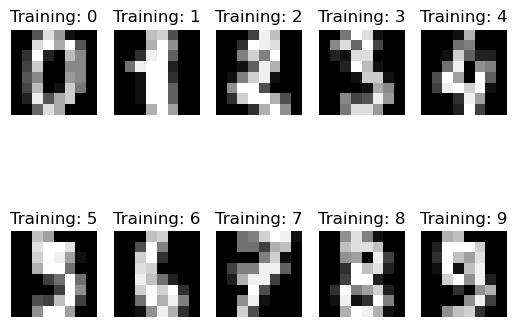

In [310]:
fig, axes = plt.subplots(2,5)
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i])
    ax.axis('off') 
    ax.set_title(f'Training: {i}')
plt.tight_layout 

Ahora bien, debemos normalizar los datos para que el algoritmo de K-means pueda encontrar las distancias correctas y en una escala buena. Para esto, usaremos el minMaxScaler dado por sklearn, esto debido a que es la opacidad de los pixeles (que es la misma en todos) por lo que considero que es una mejor forma de normalizar.

In [311]:
mM = MinMaxScaler()

In [312]:
for column in df.columns:
        df[column] = mM.fit_transform(df[column].values.reshape(-1, 1))
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


### Usemos Kmeans

Ya sabemos el número de clusters por lo que no es necesario aplicar el método del codo.

In [313]:
kmeans = KMeans(n_clusters= 10)

In [314]:
kmeans.fit(df)

c:\Users\Rafa\anaconda3\envs\analisis\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafa\anaconda3\envs\analisis\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=10)

### Chequemos el resultado de nuestros fitting

In [315]:
silhouette_score(df, kmeans.fit_predict(df))

c:\Users\Rafa\anaconda3\envs\analisis\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafa\anaconda3\envs\analisis\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


0.18122703311381147

In [316]:
kmeans.score(df)

-4647.097251216758

Visualizemos los centros.

In [317]:
centros = kmeans.cluster_centers_.reshape(10, 8, 8)
centros[0]

array([[ 0.00000000e+00,  2.04207921e-02,  3.03527228e-01,
         8.03527228e-01,  8.77784653e-01,  6.91831683e-01,
         3.16831683e-01,  6.40264026e-02],
       [ 1.30104261e-18,  6.96163366e-02,  6.61819307e-01,
         7.18750000e-01,  6.51918317e-01,  7.88056931e-01,
         3.49319307e-01,  4.57920792e-02],
       [ 6.50521303e-19,  7.02351485e-02,  3.39418317e-01,
         1.40779703e-01,  4.19863861e-01,  7.17821782e-01,
         2.12561881e-01,  1.42326733e-02],
       [-4.33680869e-19,  6.40264026e-02,  3.05693069e-01,
         4.00371287e-01,  7.57116337e-01,  7.63613861e-01,
         3.22772277e-01,  4.95049505e-03],
       [ 0.00000000e+00,  1.05374823e-01,  5.47029703e-01,
         8.15594059e-01,  9.21720297e-01,  6.79764851e-01,
         2.86421499e-01,  0.00000000e+00],
       [-8.67361738e-19,  6.89975248e-02,  3.23019802e-01,
         7.11324257e-01,  6.96163366e-01,  2.33292079e-01,
         3.43440594e-02,  0.00000000e+00],
       [ 2.16840434e-19,  6.497524

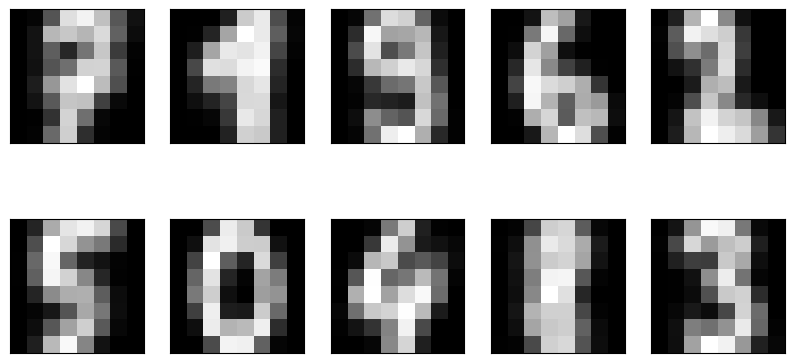

In [318]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.set(xticks=[], yticks=[])
    axi.imshow(centros[i])

### Implementamos TSNE

In [319]:
tsne = TSNE(n_components= 2, learning_rate= 'auto', init= 'random')

In [320]:
tsne_proy = tsne.fit_transform(df)
tsne_etiquetas = kmeans.fit_predict(tsne_proy)

c:\Users\Rafa\anaconda3\envs\analisis\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafa\anaconda3\envs\analisis\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


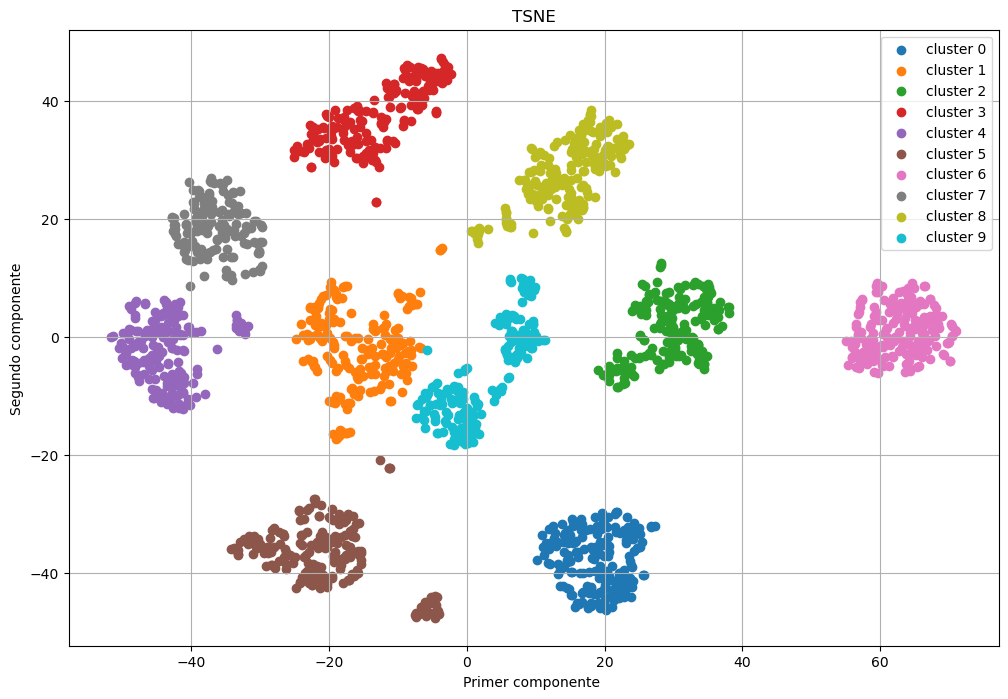

In [336]:
plt.figure(figsize= (12, 8))
for i in range(10 ): #Número de clusters
    plt.scatter(tsne_proy[tsne_etiquetas == i, 0], tsne_proy[tsne_etiquetas == i, 1], label = f'cluster {i}')
plt.title('TSNE')
plt.xlabel('Primer componente ')
plt.ylabel('Segundo componente')
plt.grid(True)
plt.legend()

Gracias a las visualizaciones vemos que hay grupos mucho más separados a otros, número que se distinguen mucho más facil en los algoritmos (y probablemente al ojo humano) que a otros como por ejemplo: el 1 y el 7 o el 8 y 9.

Sin embargo, la reducción de la dimensionalidad que ofrece TSNE nos ayuda mucho al momento de graficar y para el manejo de datos en general.

Los algoritmos de clustering como Kmeans, tienen una función indispensable en los algoritmos de aprendizaje no supervizado. En las tareas de agrupación como esta, tienen de los mejores desempeños. 